In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [79]:
day=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Bike-Sharing-Dataset/day.csv",parse_dates=["dteday"])
hour=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Bike-Sharing-Dataset/hour.csv",parse_dates=["dteday"])
trips_2011=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/2011-capitalbikeshare-tripdata.csv",parse_dates=["Start date","End date"])
station_loc=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Capital_Bike_Share_Locations.csv")

In [84]:
station_loc=station_loc.iloc[:,0:9]

In [85]:
station_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               691 non-null    float64
 1   Y               691 non-null    float64
 2   OBJECTID        691 non-null    int64  
 3   LATITUDE        691 non-null    float64
 4   LONGITUDE       691 non-null    float64
 5   NAME            691 non-null    object 
 6   STATION_TYPE    691 non-null    object 
 7   STATION_ID      691 non-null    int64  
 8   STATION_STATUS  691 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 48.7+ KB


In [3]:
# Bike trips 2012
files_2012=glob.glob("/Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/2012-capitalbikeshare-tripdata/*.csv")
trips_2012=pd.DataFrame()
for file in files_2012:
    data=pd.read_csv(file,parse_dates=["Start date","End date"])
    data["filename"]=file
    trips_2012=pd.concat([trips_2012,data])


In [4]:
trips=trips_2011.append(trips_2012)

/var/folders/bn/ghpvp69d0vd0t7sb_kbnxzqw0000gn/T/ipykernel_52763/2382772095.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips=trips_2011.append(trips_2012)


In [5]:
trips.shape

(3255678, 10)

In [6]:
day.shape

(731, 16)

In [7]:
day.info()
day.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour.shape

(17379, 17)

In [9]:
hour.info()
hour.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
hour.loc[hour["season"]==1,"season"]="Winter"
hour.loc[hour["season"]==2,"season"]="Spring"
hour.loc[hour["season"]==3,"season"]="Summer"
hour.loc[hour["season"]==4,"season"]="Fall"

day.loc[day["season"]==1,"season"]="Winter"
day.loc[day["season"]==2,"season"]="Spring"
day.loc[day["season"]==3,"season"]="Summer"
day.loc[day["season"]==4,"season"]="Fall"


In [13]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 566831
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   filename              object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 273.2+ MB


In [14]:
trips.isna().sum()

Duration                      0
Start date                    0
End date                      0
Start station number          0
Start station                 0
End station number            0
End station                   0
Bike number                   0
Member type                   0
filename                1226767
dtype: int64

In [15]:
trips.isnull().sum()

Duration                      0
Start date                    0
End date                      0
Start station number          0
Start station                 0
End station number            0
End station                   0
Bike number                   0
Member type                   0
filename                1226767
dtype: int64

In [16]:
trips.drop(columns=["filename"],inplace=True)


DATE TIME

In [17]:
pd.to_datetime(hour["dteday"])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [18]:
pd.to_datetime(trips["Start date"])
pd.to_datetime(trips["End date"])

0        2011-01-01 01:00:37
1        2011-01-01 00:08:32
2        2011-01-01 00:15:36
3        2011-01-01 00:16:36
4        2011-01-01 00:32:19
                 ...        
566827   2012-07-01 00:00:52
566828   2012-07-01 00:21:18
566829   2012-07-01 00:06:19
566830   2012-07-01 00:15:21
566831   2012-07-01 00:10:18
Name: End date, Length: 3255678, dtype: datetime64[ns]

In [19]:
trips["mnth"]=pd.DatetimeIndex(trips["Start date"]).month
trips["weekday"]=pd.DatetimeIndex(trips["Start date"]).weekday
trips["dteday"]=pd.DatetimeIndex(trips["Start date"]).date

In [20]:
trips["dteday"]=pd.to_datetime(trips["dteday"])

In [21]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 566831
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   mnth                  int64         
 10  weekday               int64         
 11  dteday                datetime64[ns]
dtypes: datetime64[ns](3), int64(5), object(4)
memory usage: 322.9+ MB


In [22]:

# HOUR DF
hour["season"]=pd.Categorical(hour["season"],categories=("Winter","Spring","Summer","Fall"))
hour["is_holiday"]=hour["holiday"]
hour.loc[hour["is_holiday"]==1,"is_holiday"]="Yes"
hour.loc[hour["is_holiday"]==0,"is_holiday"]="No"
hour["is_holiday"]=pd.Categorical(hour["is_holiday"],categories=("Yes","No"))

#DAY DF

day["season"]=pd.Categorical(day["season"],categories=("Winter","Spring","Summer","Fall"))
day["is_holiday"]=day["holiday"]
day.loc[day["is_holiday"]==1,"is_holiday"]="Yes"
day.loc[day["is_holiday"]==0,"is_holiday"]="No"
day["is_holiday"]=pd.Categorical(day["is_holiday"],categories=("Yes","No"))


#TRIPS DF

trips["season"]=trips["mnth"]
trips["season"].replace({1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",6:"Summer",7:"Summer",8:"Summer",9:"Fall",10:"Fall",11:"Fall",12:"Winter"},inplace=True)
trips["season"]=pd.Categorical(trips["season"],categories=("Winter","Spring","Summer","Fall"))

In [23]:
# Normalised values to meaningful values

# HOUR DF
hour["tem_cel"]=np.ceil(hour["temp"]*47-8).astype(int)
hour["atemp_cel"]=np.ceil(hour["temp"]*66-16).astype(int)
hour["windspeed_"]=np.ceil(hour["windspeed"]*67).astype(int)

# DAY DF
day["tem_cel"]=np.ceil(day["temp"]*47-8).astype(int)
day["atemp_cel"]=np.ceil(day["temp"]*66-16).astype(int)
day["windspeed_"]=np.ceil(day["windspeed"]*67).astype(int)


In [24]:
#weekday name

hour["day_name"]=hour["weekday"]
hour["day_name"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)
trips["day_name"]=trips["weekday"]
trips["day_name"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)

In [25]:
# Holiday colummn for "Trips" dataset
holiday_list=day[["dteday","holiday","is_holiday"]]
trips=pd.merge(trips,holiday_list,on="dteday",how="left")

In [26]:
trips.loc[trips["Member type"]=="Member","Member type"]="registered"
trips.loc[trips["Member type"]=="Casual","Member type"]="casual"

In [27]:
trips["route"]=trips["Start station"]+" - "+trips["End station"]

In [28]:
trips.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,mnth,weekday,dteday,season,day_name,holiday,is_holiday,route
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,registered,1,5,2011-01-01,Winter,Fri,0,No,5th & F St NW - 5th & F St NW
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,casual,1,5,2011-01-01,Winter,Fri,0,No,14th & Harvard St NW - 14th & V St NW
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,registered,1,5,2011-01-01,Winter,Fri,0,No,Georgia & New Hampshire Ave NW - Adams Mill & ...
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,registered,1,5,2011-01-01,Winter,Fri,0,No,10th & U St NW - Florida Ave & R St NW
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,casual,1,5,2011-01-01,Winter,Fri,0,No,Adams Mill & Columbia Rd NW - Calvert & Biltmo...


In [29]:
hour.describe()

,instant,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tem_cel,atemp_cel,windspeed_
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.872375,17.280166,13.239945
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,9.033183,12.696745,8.269943
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.000000,-14.000000,0.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,8.000000,7.000000,8.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,16.000000,17.000000,13.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,24.000000,28.000000,17.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,39.000000,50.000000,57.000000


In [30]:
trips.describe()

,Duration,Start station number,End station number,mnth,weekday,holiday
count,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06
mean,1.084497e+03,3.128974e+04,3.129182e+04,6.936537e+00,2.998742e+00,2.382514e-02
std,2.100267e+03,1.931212e+02,1.923761e+02,3.037865e+00,1.974851e+00,1.525041e-01
min,6.000000e+01,3.100000e+04,3.100000e+04,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.990000e+02,3.120000e+04,3.120100e+04,5.000000e+00,1.000000e+00,0.000000e+00
50%,6.580000e+02,3.122600e+04,3.122500e+04,7.000000e+00,3.000000e+00,0.000000e+00
75%,1.092000e+03,3.140100e+04,3.140200e+04,9.000000e+00,5.000000e+00,0.000000e+00
max,8.635500e+04,3.180600e+04,3.180600e+04,1.200000e+01,6.000000e+00,1.000000e+00


In [31]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 3255677
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   mnth                  int64         
 10  weekday               int64         
 11  dteday                datetime64[ns]
 12  season                category      
 13  day_name              object        
 14  holiday               int64         
 15  is_holiday            category      
 16  route                 object        
dtypes: category(2), datetime64[ns](3), int64(6), object(6)
memory usage: 403.6+ MB


EDA (HOUR DF)

In [32]:
# Weather score
hour["hum_score"]=hour["hum"]
hour["temp_score"]=hour["tem_cel"]
hour["wind_score"]=hour["windspeed_"]


hour["hum_score"]=np.where(hour["hum_score"]>=0.78,4,hour["hum_score"])
hour["hum_score"]=np.where((hour["hum_score"]>=0.63)&(hour["hum_score"]<0.78),3,hour["hum_score"])
hour["hum_score"]=np.where((hour["hum_score"]>=0.48)&(hour["hum_score"]<0.63),2,hour["hum_score"])
hour["hum_score"]=np.where(hour["hum_score"]<0.48,1,hour["hum_score"])


hour["temp_score"]=np.where((hour["temp_score"]>=0)&(hour["temp_score"]<10),3,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=10)&(hour["temp_score"]<16),2,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=25)&(hour["temp_score"]<30),2,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=16)&(hour["temp_score"]<25),1,hour["temp_score"])
hour["temp_score"]=np.where(hour["temp_score"]>=30,4,hour["temp_score"])
hour["temp_score"]=np.where(hour["temp_score"]<0,4,hour["temp_score"])


hour["wind_score"]=np.where((hour["wind_score"]>=0)&(hour["wind_score"]<13),1,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=13)&(hour["wind_score"]<25),2,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=25)&(hour["wind_score"]<39),3,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=39),4,hour["wind_score"])

hour["weather_score"]=((hour["temp_score"]*0.4)+(hour["hum_score"]*0.3)+(hour["wind_score"]*0.1)+(hour["weathersit"]*0.2))


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

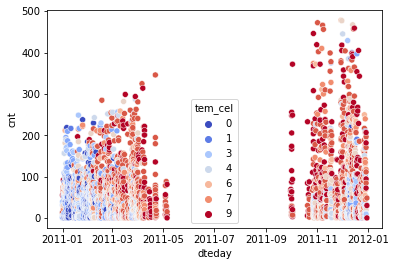

In [33]:
DF_temp_score3=hour.loc[((hour["tem_cel"]>=0) & (hour["tem_cel"]<10))]
sns.scatterplot(data=DF_temp_score3[DF_temp_score3["yr"]==0],y="cnt",x="dteday",hue="tem_cel",palette="coolwarm")

Impact of the weather condition  on the amount of trips

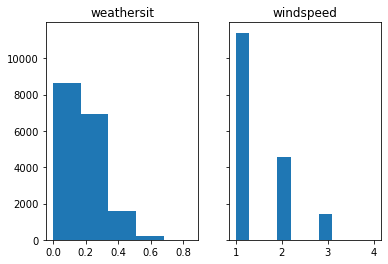

In [34]:

fig,axs=plt.subplots(1,2,sharey=True)
axs[0].set_title("weathersit")
axs[1].set_title("windspeed")

axs[0].hist(hour["windspeed"],bins=5)
axs[1].hist(hour["weathersit"],bins=10)

plt.show()

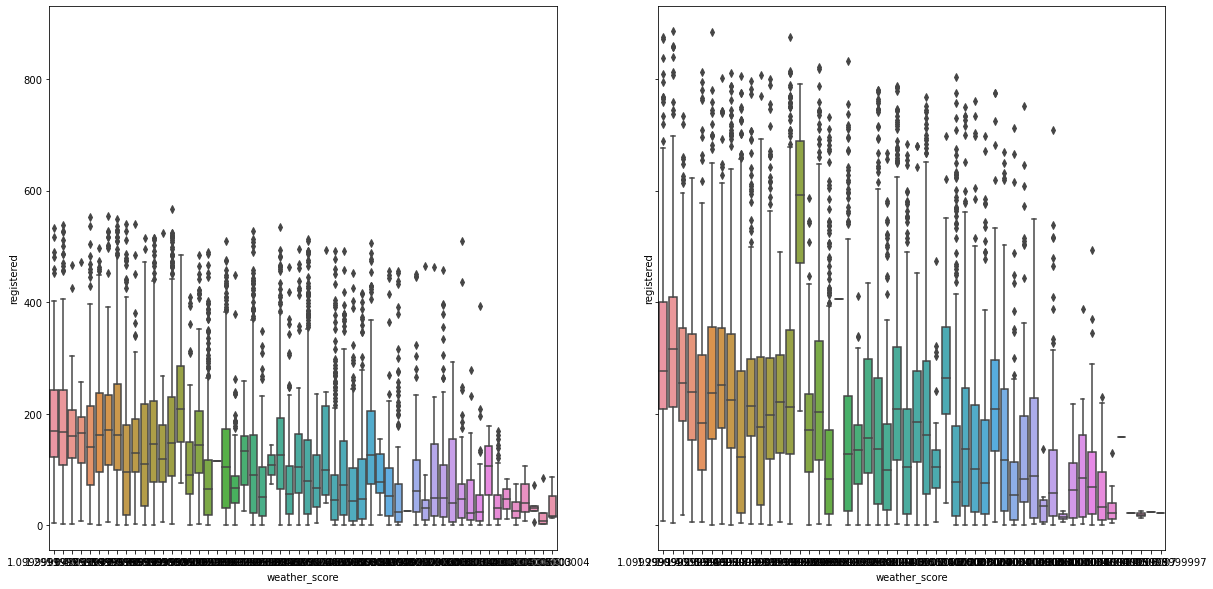

In [35]:

fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)
axs[0].set_xlim(1,4)
axs[0].set_xticks(range(1,4))
axs[1].set_xlim(1,4)
axs[1].set_xticks(range(1,4))
sns.boxplot(data=hour[hour["yr"]==0],y="registered",x="weather_score",ax=axs[0])
sns.boxplot(data=hour[hour["yr"]==1],y="registered",x="weather_score",ax=axs[1])
plt.show()

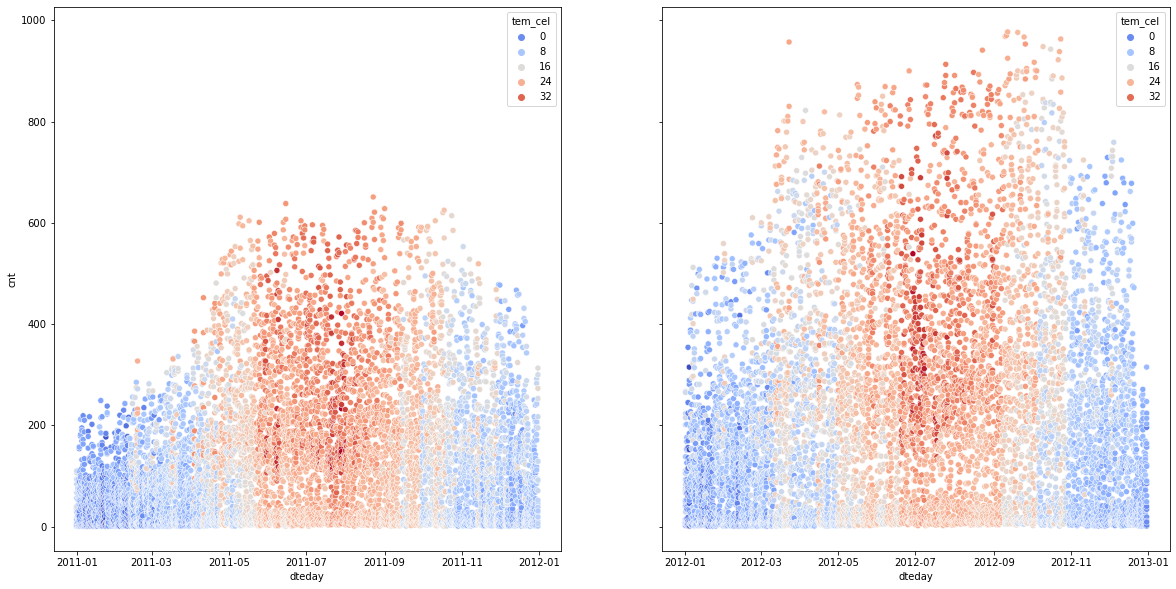

In [36]:

fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)

sns.scatterplot(data=hour[hour["yr"]==0],y="cnt",x="dteday",hue="tem_cel",palette="coolwarm",ax=axs[0])
sns.scatterplot(data=hour[hour["yr"]==1],y="cnt",x="dteday",hue="tem_cel",palette="coolwarm",ax=axs[1])
plt.show()

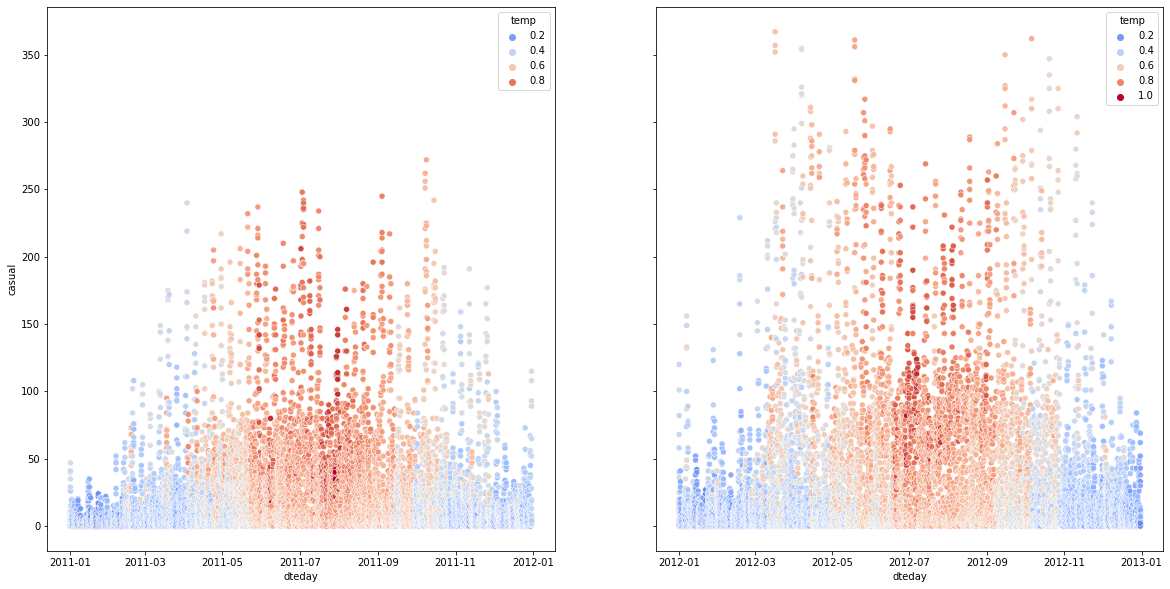

In [37]:
fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)

sns.scatterplot(data=hour[hour["yr"]==0],y="casual",x="dteday",hue="temp",palette="coolwarm",ax=axs[0])
sns.scatterplot(data=hour[hour["yr"]==1],y="casual",x="dteday",hue="temp",palette="coolwarm",ax=axs[1])
plt.show()

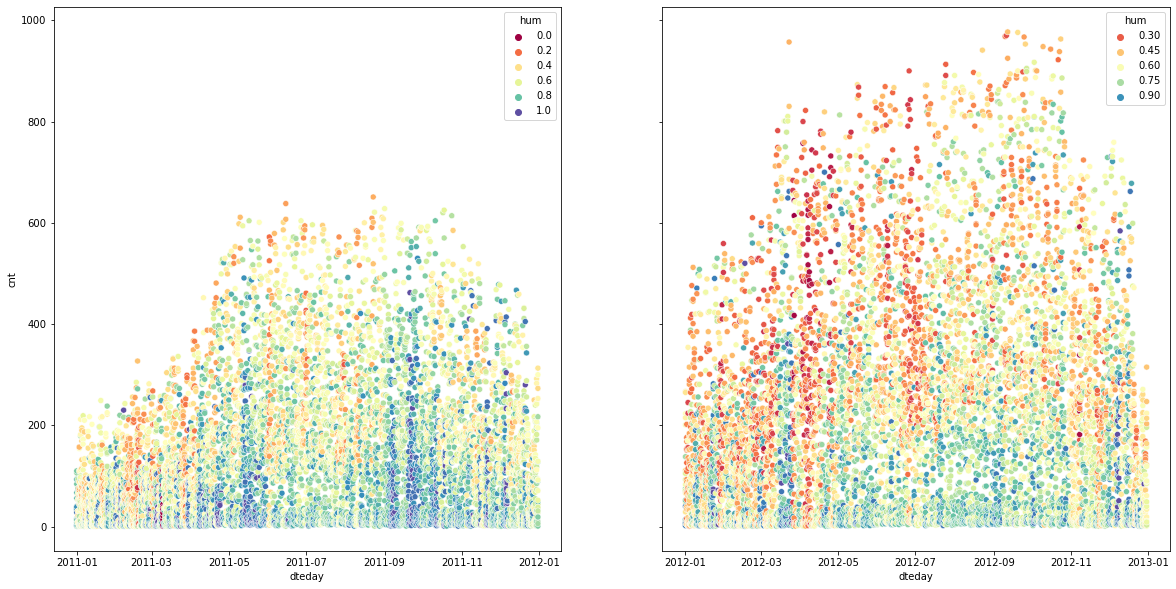

In [38]:

fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)


sns.scatterplot(data=hour[hour["yr"]==0],y="cnt",x="dteday",hue="hum",palette="Spectral",ax=axs[0],hue_order=range(0,1))
sns.scatterplot(data=hour[hour["yr"]==1],y="cnt",x="dteday",hue="hum",palette="Spectral",ax=axs[1],hue_order=range(0,1))
plt.show()

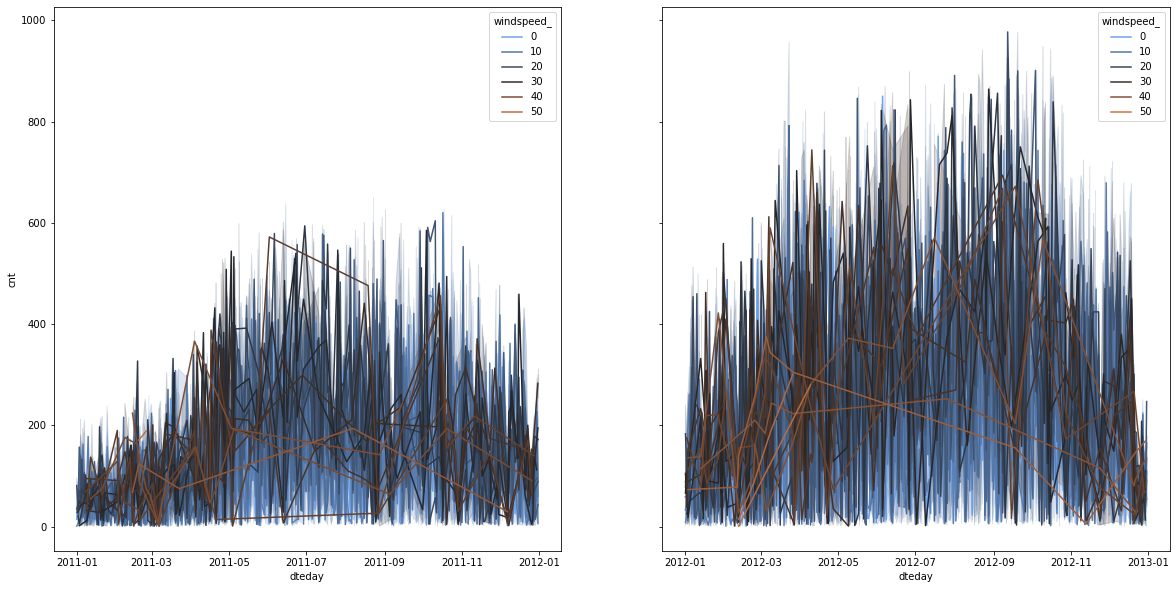

In [39]:
fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)

my_palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

sns.lineplot(data=hour[hour["yr"]==0],y="cnt",x="dteday",hue="windspeed_",palette=my_palette,ax=axs[0],hue_order=range(0,60))
sns.lineplot(data=hour[hour["yr"]==1],y="cnt",x="dteday",hue="windspeed_",palette=my_palette,ax=axs[1],hue_order=range(0,60))
plt.show()

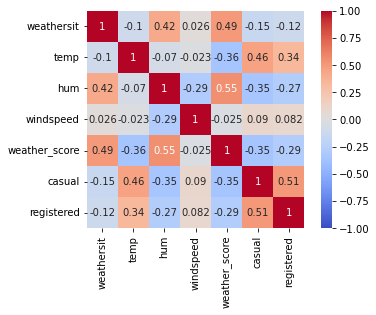

In [40]:

weather=hour[["weathersit","temp","hum","windspeed","weather_score","casual","registered"]].copy()

matrix_weather=weather.corr()

sns.heatmap(data=matrix_weather,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=True,annot=True )
plt.show()

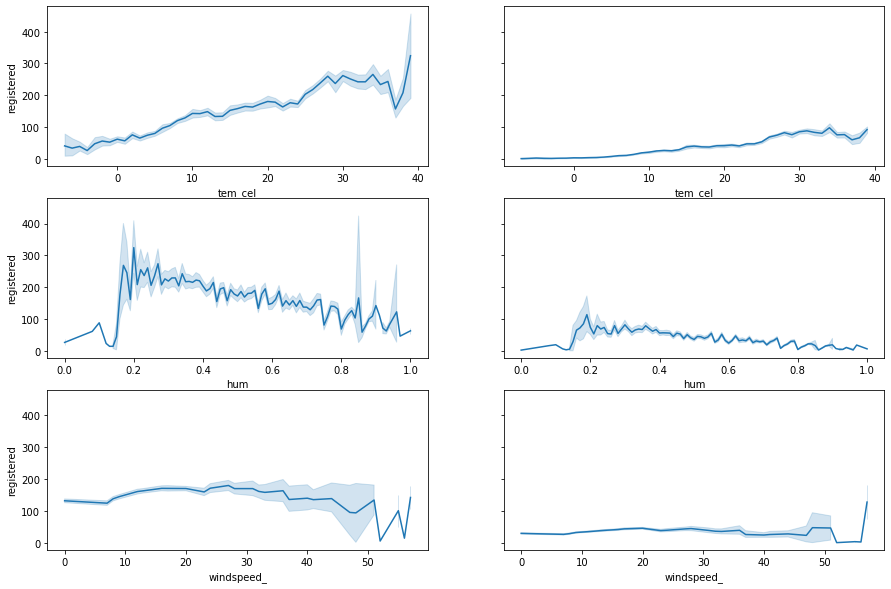

In [41]:
fig,axs=plt.subplots(3,2,figsize=(15,10),sharey=True)
sns.lineplot(data=hour,x="tem_cel",y="registered",palette="coolwarm",ax=axs[0,0],estimator=np.mean)
sns.lineplot(data=hour,x="tem_cel",y="casual",palette="coolwarm",ax=axs[0,1],estimator=np.mean)
sns.lineplot(data=hour,x="hum",y="registered",palette="coolwarm",ax=axs[1,0],estimator=np.mean)
sns.lineplot(data=hour,x="hum",y="casual",palette="coolwarm",ax=axs[1,1],estimator=np.mean)
sns.lineplot(data=hour,x="windspeed_",y="registered",palette="coolwarm",ax=axs[2,0],estimator=np.mean)
sns.lineplot(data=hour,x="windspeed_",y="casual",palette="coolwarm",ax=axs[2,1],estimator=np.mean)

plt.show()

Impact of the month/weekday/hour   on the amount of trips

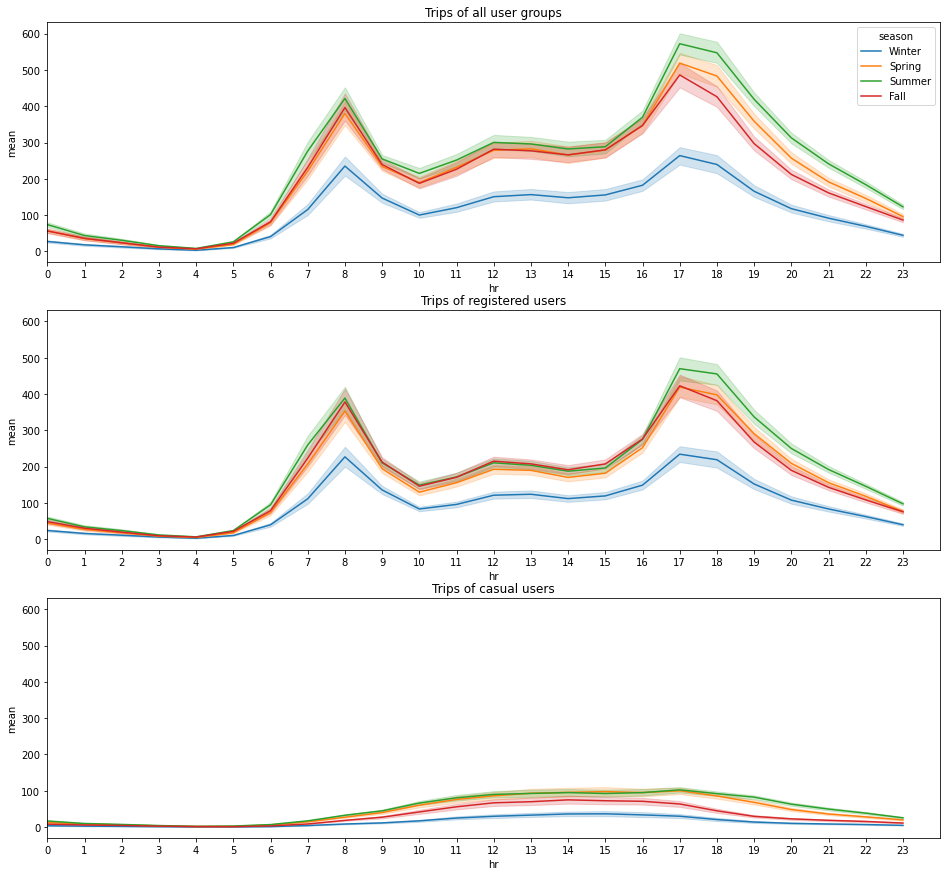

In [42]:
# The most popular hours to rent the bike 
fig,axs=plt.subplots(3,1,figsize=(16,15),sharey=True)
axs[0].set_title("Trips of all user groups")
axs[2].set_title("Trips of casual users")
axs[1].set_title("Trips of registered users")
axs[0].set(xlabel="",ylabel="mean")
axs[2].set(xlabel="",ylabel="mean")
axs[1].set(xlabel="",ylabel="mean")
axs[0].set_xlim(0,24)
axs[0].set_xticks(range(0,24))
axs[1].set_xlim(0,24)
axs[1].set_xticks(range(0,24))
axs[2].set_xlim(0,24)
axs[2].set_xticks(range(0,24))
sns.lineplot(data=hour,x="hr",y="cnt",hue="season",markers=True,estimator=np.mean,ax=axs[0])
sns.lineplot(data=hour,x="hr",y="registered",hue="season",markers=True,estimator=np.mean,ax=axs[1],legend=None)
sns.lineplot(data=hour,x="hr",y="casual",hue="season",markers=True,estimator=np.mean,ax=axs[2],legend=None)


plt.show()

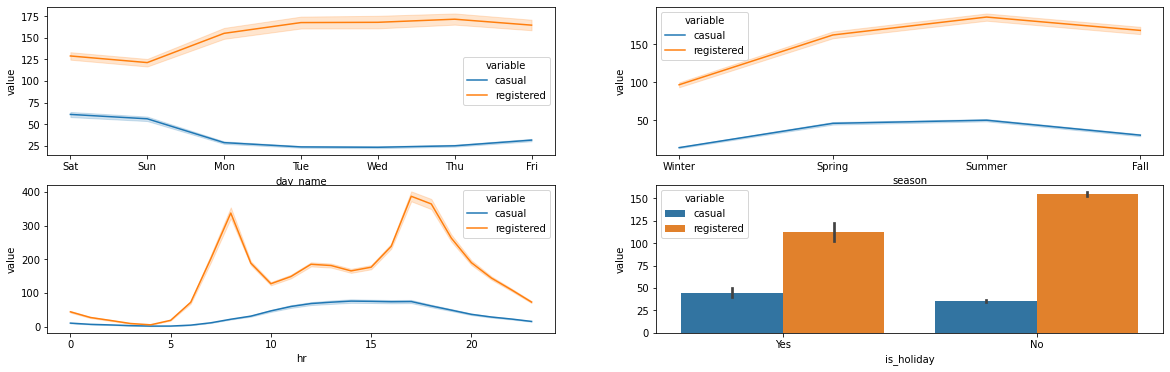

In [43]:
hours_melt=pd.melt(hour,id_vars=["instant","dteday","day_name","season","yr","mnth","hr","holiday","weekday","workingday","weathersit","tem_cel","atemp_cel","hum","windspeed_","is_holiday","weather_score"],value_vars=["casual","registered"])

fig,axs=plt.subplots(2,2,figsize=(20,6))

sns.lineplot(data=hours_melt,x="day_name",y="value",hue="variable",estimator=np.mean,ax=axs[0,0])
sns.lineplot(data=hours_melt,x="season",y="value",hue="variable",estimator=np.mean,ax=axs[0,1])
sns.lineplot(data=hours_melt,x="hr",y="value",hue="variable",estimator=np.mean,ax=axs[1,0])
sns.barplot(data=hours_melt,x="is_holiday",y="value",hue="variable",estimator=np.mean,ax=axs[1,1])
plt.show()


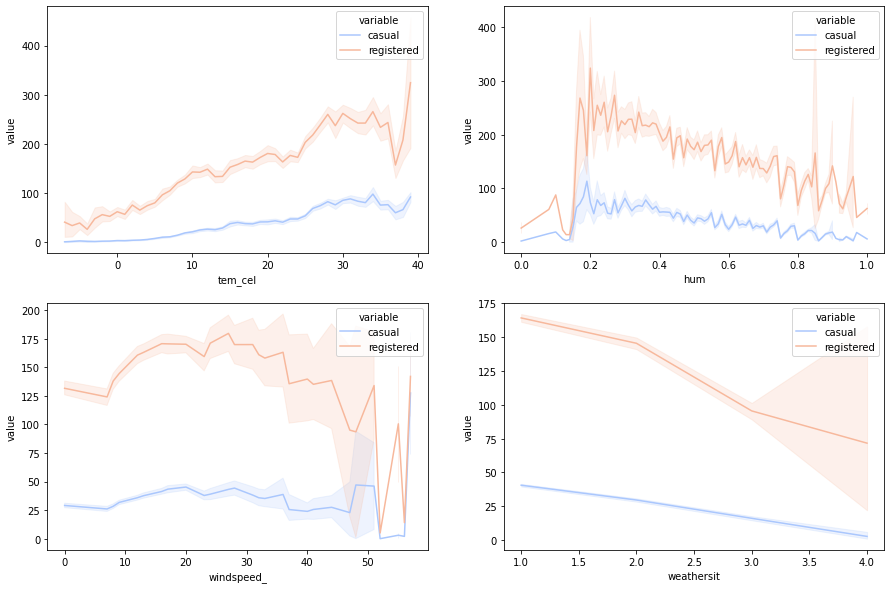

In [44]:
fig,axs=plt.subplots(2,2,figsize=(15,10))
sns.lineplot(data=hours_melt,x="tem_cel",y="value",palette="coolwarm",ax=axs[0,0],estimator=np.mean,hue="variable")
sns.lineplot(data=hours_melt,x="hum",y="value",palette="coolwarm",ax=axs[0,1],estimator=np.mean,hue="variable")
sns.lineplot(data=hours_melt,x="windspeed_",y="value",palette="coolwarm",ax=axs[1,0],estimator=np.mean,hue="variable")
sns.lineplot(data=hours_melt,x="weathersit",y="value",palette="coolwarm",ax=axs[1,1],estimator=np.mean,hue="variable")


plt.show()

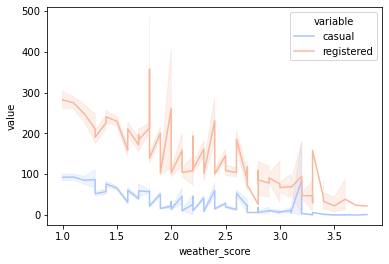

In [45]:
sns.lineplot(data=hours_melt,x="weather_score",y="value",palette="coolwarm",estimator=np.mean,hue="variable")
plt.show()

EDA TRIPS

In [46]:
trips.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,mnth,weekday,dteday,season,day_name,holiday,is_holiday,route
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,registered,1,5,2011-01-01,Winter,Fri,0,No,5th & F St NW - 5th & F St NW
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,casual,1,5,2011-01-01,Winter,Fri,0,No,14th & Harvard St NW - 14th & V St NW
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,registered,1,5,2011-01-01,Winter,Fri,0,No,Georgia & New Hampshire Ave NW - Adams Mill & ...
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,registered,1,5,2011-01-01,Winter,Fri,0,No,10th & U St NW - Florida Ave & R St NW
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,casual,1,5,2011-01-01,Winter,Fri,0,No,Adams Mill & Columbia Rd NW - Calvert & Biltmo...


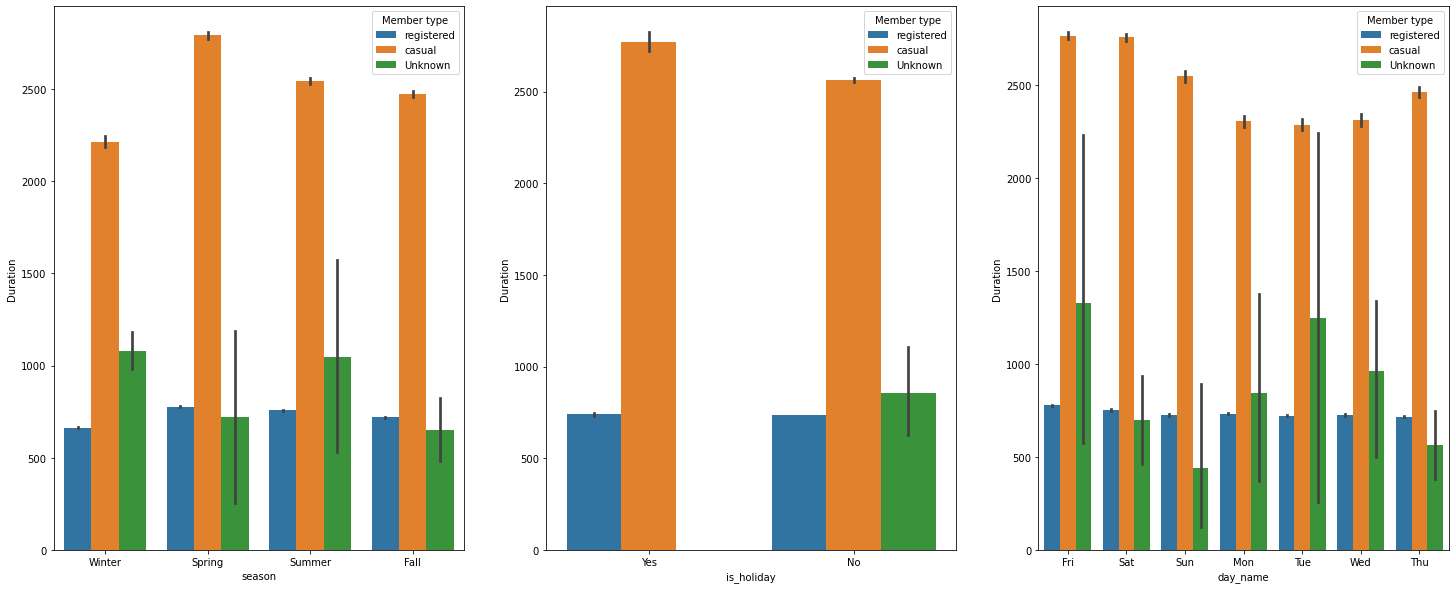

In [78]:
fig,axs=plt.subplots(1,3,figsize=(25,10))
sns.barplot(data=trips,x="season",y="Duration",estimator=np.mean,hue="Member type",ax=axs[0])
sns.barplot(data=trips,x="is_holiday",y="Duration",estimator=np.mean,hue="Member type",ax=axs[1])
sns.barplot(data=trips,x="day_name",y="Duration",estimator=np.mean,hue="Member type",ax=axs[2])
plt.show()

Popular routs & station

In [49]:
label=["Route","Count"]
routes_list=trips["route"].value_counts(dropna=False).rename_axis("Route").reset_index(name='Count')

In [92]:
station_start_list=trips["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
station_start_list["Station type"]="Start station"
station_start_loc=pd.merge(station_start_list,station_loc,on="NAME",how="left")

In [96]:
station_start_loc.head(5)

,NAME,Count,Station type,X,Y,OBJECTID,LATITUDE,LONGITUDE,STATION_TYPE,STATION_ID,STATION_STATUS
0,Massachusetts Ave & Dupont Circle NW,107162,Start station,-77.044404,38.910104,68794566.0,38.910100,-77.044400,classic,51.0,active
1,Columbus Circle / Union Station,77750,Start station,-77.004936,38.896969,68794627.0,38.896960,-77.004930,classic,113.0,active
2,15th & P St NW,73707,Start station,-77.034430,38.909810,68794539.0,38.909801,-77.034427,classic,23.0,active
3,17th & Corcoran St NW,63502,Start station,-77.038697,38.912106,68794574.0,38.912100,-77.038700,classic,59.0,active
4,Adams Mill & Columbia Rd NW,62378,Start station,-77.042532,38.922861,68794534.0,38.922849,-77.042525,classic,18.0,active


In [94]:
station_end_list=trips["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
station_end_list["Station type"]="End station"
station_end_loc=pd.merge(station_end_list,station_loc,on="NAME",how="left")


In [95]:
station_end_loc.head(5)

,NAME,Count,Station type,X,Y,OBJECTID,LATITUDE,LONGITUDE,STATION_TYPE,STATION_ID,STATION_STATUS
0,Massachusetts Ave & Dupont Circle NW,118707,End station,-77.044404,38.910104,68794566.0,38.910100,-77.044400,classic,51.0,active
1,15th & P St NW,83457,End station,-77.034430,38.909810,68794539.0,38.909801,-77.034427,classic,23.0,active
2,Columbus Circle / Union Station,79681,End station,-77.004936,38.896969,68794627.0,38.896960,-77.004930,classic,113.0,active
3,17th & Corcoran St NW,67382,End station,-77.038697,38.912106,68794574.0,38.912100,-77.038700,classic,59.0,active
4,14th & V St NW,59658,End station,-77.032093,38.917774,68794532.0,38.917765,-77.032096,classic,15.0,active


In [102]:
station_list_loc=pd.concat([station_end_loc,station_start_loc],ignore_index=True,sort=True)

In [103]:
station_list_loc.head(50)

,Count,LATITUDE,LONGITUDE,NAME,OBJECTID,STATION_ID,STATION_STATUS,STATION_TYPE,Station type,X,Y
0,118707,38.910100,-77.044400,Massachusetts Ave & Dupont Circle NW,68794566.0,51.0,active,classic,End station,-77.044404,38.910104
1,83457,38.909801,-77.034427,15th & P St NW,68794539.0,23.0,active,classic,End station,-77.034430,38.909810
2,79681,38.896960,-77.004930,Columbus Circle / Union Station,68794627.0,113.0,active,classic,End station,-77.004936,38.896969
3,67382,38.912100,-77.038700,17th & Corcoran St NW,68794574.0,59.0,active,classic,End station,-77.038697,38.912106
4,59658,38.917765,-77.032096,14th & V St NW,68794532.0,15.0,active,classic,End station,-77.032093,38.917774
5,57145,38.915544,-77.038252,New Hampshire Ave & T St NW,68794617.0,102.0,active,classic,End station,-77.038250,38.915556
6,54811,38.899700,-77.023086,8th & H St NW,68794607.0,92.0,active,classic,End station,-77.023093,38.899706
7,54259,38.900711,-77.046449,21st & I St NW,68794543.0,27.0,active,classic,End station,-77.046450,38.900717
8,54070,NaN,NaN,Eastern Market Metro / Pennsylvania Ave & 7th ...,NaN,NaN,NaN,NaN,End station,NaN,NaN
9,52546,38.922849,-77.042525,Adams Mill & Columbia Rd NW,68794534.0,18.0,active,classic,End station,-77.042532,38.922861


In [105]:
station_list_loc[station_list_loc["X"]=="NaN"]

,Count,LATITUDE,LONGITUDE,NAME,OBJECTID,STATION_ID,STATION_STATUS,STATION_TYPE,Station type,X,Y


In [87]:
stations_list.head(50)

,Count
0,107162
1,77750
2,73707
3,63502
4,62378
5,58356
6,56029
7,55812
8,50142
9,49812


In [75]:
station_start_list.sum()

Start station    Massachusetts Ave & Dupont Circle NWColumbus C...
Count                                                      3255678
dtype: object

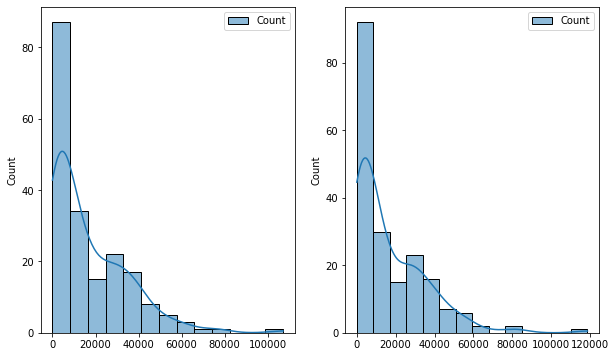

In [72]:
fig,axs=plt.subplots(1,2,figsize=(10,6))
sns.histplot(data=station_start_list,kde=True,ax=axs[0])
sns.histplot(data=station_end_list,kde=True,ax=axs[1])
plt.show()

In [69]:
station_end_list.describe()

,Count
count,194.000000
mean,16781.845361
std,18662.063644
min,3.000000
25%,2165.500000
50%,9511.000000
75%,27307.000000
max,118707.000000


In [50]:
popular_routes=routes_list[routes_list['Count']>=126]

In [51]:
popular_routes.sum()

Route    Eastern Market Metro / Pennsylvania Ave & 7th ...
Count                                              2809042
dtype: object

In [52]:
trips.shape

(3255678, 17)

In [53]:
routes_list.describe()

,Count
count,22799.000000
mean,142.799158
std,355.602179
min,1.000000
25%,4.000000
50%,27.000000
75%,126.000000
max,10205.000000


In [54]:
popular_routes.describe()

,Count
count,5701.000000
mean,492.727942
std,582.662924
min,126.000000
25%,195.000000
50%,310.000000
75%,558.000000
max,10205.000000


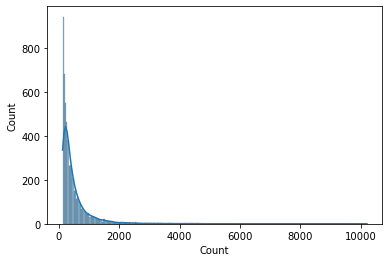

In [55]:
sns.histplot(data=popular_routes,x="Count",kde=True)
plt.show()

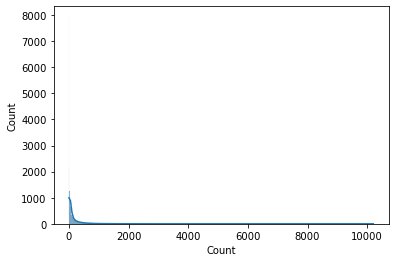

In [56]:
sns.histplot(data=routes_list,x="Count",kde=True)
plt.show()

In [57]:
popular_routes.head(30)

,Route,Count
0,Eastern Market Metro / Pennsylvania Ave & 7th ...,10205
1,Adams Mill & Columbia Rd NW - Calvert & Biltmo...,9278
2,Lincoln Park / 13th & East Capitol St NE - Ea...,8770
3,Calvert & Biltmore St NW - Adams Mill & Columb...,8722
4,Massachusetts Ave & Dupont Circle NW - 15th & ...,6713
5,New Hampshire Ave & T St NW - Massachusetts Av...,6386
6,15th & P St NW - Massachusetts Ave & Dupont Ci...,6044
7,13th & D St NE - Columbus Circle / Union Station,5801
8,Massachusetts Ave & Dupont Circle NW - New Ham...,5452
9,Columbus Circle / Union Station - 13th & D St NE,5359


In [58]:
popular_routes.head(1000).sum()

Route    Eastern Market Metro / Pennsylvania Ave & 7th ...
Count                                              1374736
dtype: object